In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage.transform import radon, rescale, rotate
from scipy.interpolate import RectBivariateSpline

In [3]:
# Crear imagen
image = np.ones([100,100])
diag = len(np.diag(image)//2)
image = np.pad(image, pad_width=diag+10)
# Sistema de Coordenadas
_ = np.linspace(-1, 1, image.shape[0])
xv, yv = np.meshgrid(_,_)
image[(xv-0.1)**2+(yv-0.2)**2<0.01] = 2

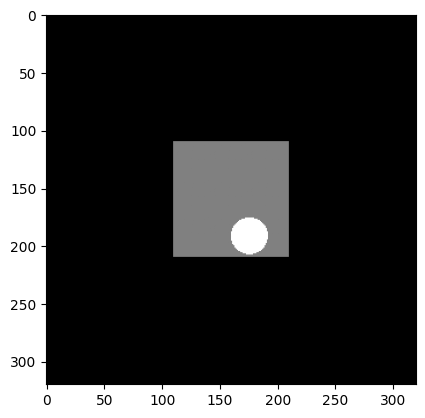

In [4]:
plt.imshow(image,cmap='gray')

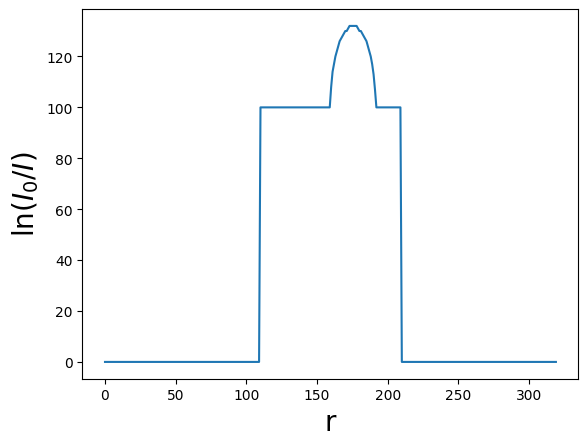

In [5]:
# Projection
p=image.sum(axis=0)
plt.plot(p)
plt.xlabel('r', fontsize=20)
plt.ylabel('$\ln(I_0/I)$', fontsize=20)
plt.show()

In [6]:
# Rotar la imagen
thetas = np.arange(0,180,5) * np.pi/180
rs = _
dtheta = np.diff(thetas)[0]
dr = np.diff(rs)[0]
rotations = np.array([rotate(image, theta*180/np.pi) for theta in thetas])

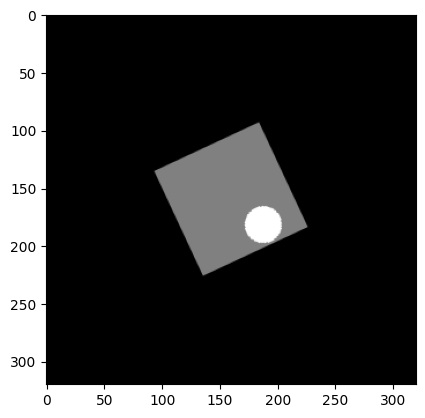

In [7]:
plt.imshow(rotations[5],cmap='gray')

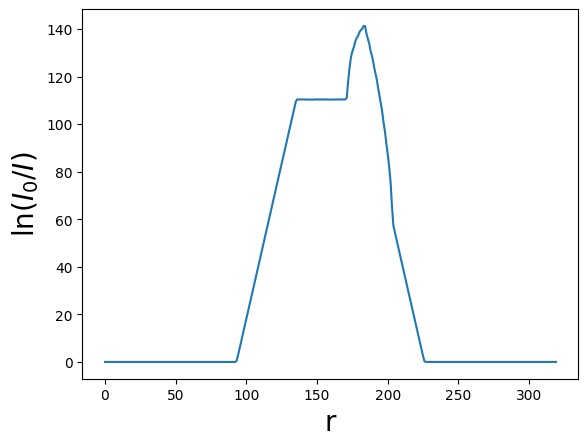

In [8]:
p=rotations[5].sum(axis=0)
plt.plot(p)
plt.xlabel('r', fontsize=20)
plt.ylabel('$\ln(I_0/I)$', fontsize=20)
plt.show()

In [9]:
p = np.array([rotation.sum(axis=0) for rotation in rotations]).T

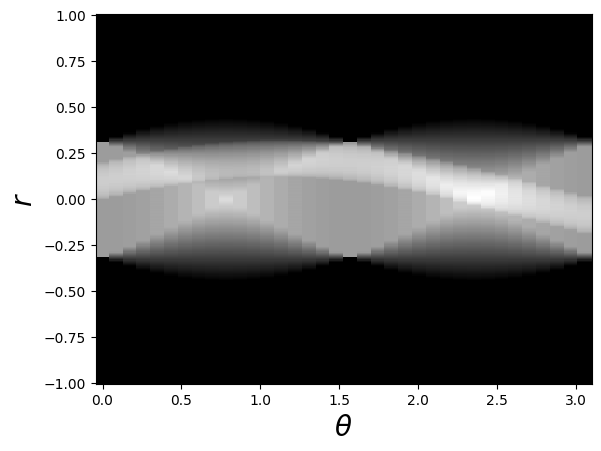

In [10]:
plt.pcolor(thetas, rs, p, shading='auto',cmap='gray')
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('$r$', fontsize=20)
plt.show()

In [11]:
theta = np.arange(0., 180., 2)
sinogram = radon(image, theta=theta)

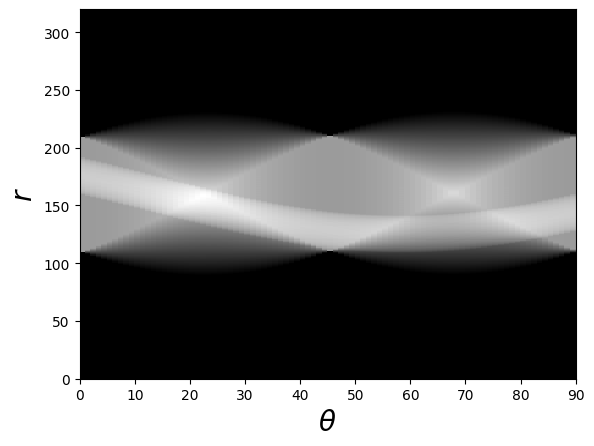

In [12]:
plt.pcolor(sinogram, cmap='gray')
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('$r$', fontsize=20)
plt.show()

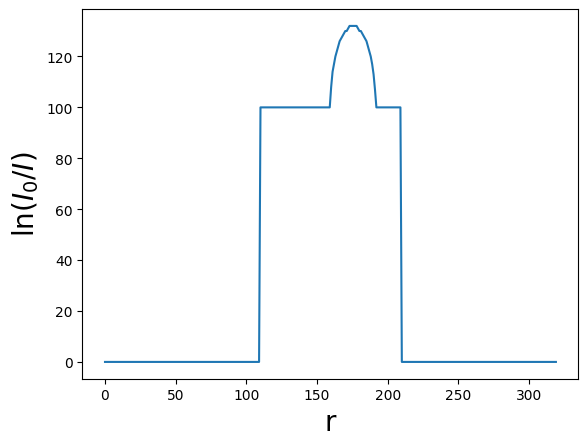

In [116]:
plt.plot(sinogram[:,0])
plt.xlabel('r', fontsize=20)
plt.ylabel('$\ln(I_0/I)$', fontsize=20)
plt.show()

# **Filtered Back projection**

In [14]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
from skimage.transform import radon, iradon

In [15]:
# Transformada de Fouirer
sinogram_fft = fft(sinogram, axis=0)

In [16]:
num_pixels, num_projections = sinogram.shape
freqs = fftfreq(num_pixels).reshape(num_pixels, 1)
ramp = np.abs(freqs) # Ramp filter |ω|

In [17]:
# Multiplicar por Filtro (convolución en dominio espacial)
filtered_fft = sinogram_fft * ramp
filtered_sinogram = np.real(ifft(filtered_fft, axis=0))

Text(0.5, 1.0, 'Reconstructed Image (Backprojection)')

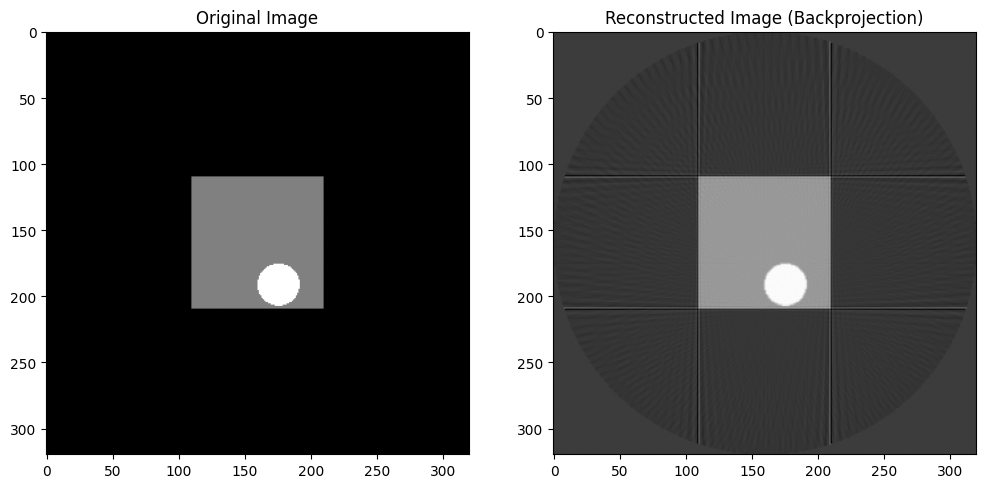

In [18]:
reconstructed_image = iradon(filtered_sinogram, theta=theta, filter_name=None, circle=True)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[1].imshow(reconstructed_image, cmap='gray')
axes[1].set_title("Reconstructed Image (Backprojection)")

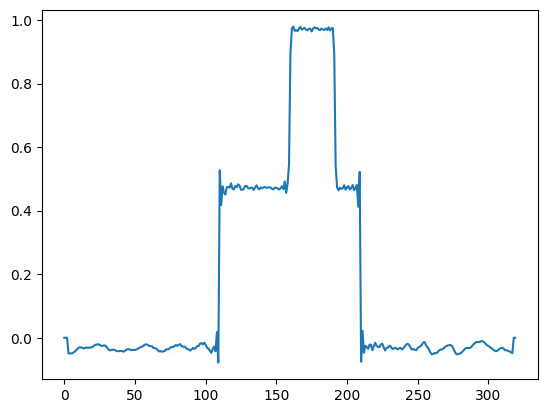

In [19]:
plt.plot(reconstructed_image[190])

In [133]:
num_projections

36